Необходимо создать, обучить нейронную сеть и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания цифр из MNIST
* сохраните веса (модель)
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


In [ ]:
# Загружаем базу mnist
from tensorflow.keras.datasets import mnist

# Сеть прямого распространения
from tensorflow.keras.models import Sequential

# Базовые слои для счёрточных сетей
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta

# Используем дял to_categoricall
from tensorflow.keras import utils

# Для отрисовки изображений
from tensorflow.keras.preprocessing import image

# Для загрузки своей картинки
from google.colab import files

# Библиотека работы с массивами
import numpy as np

# Для отрисовки графиков
import matplotlib.pyplot as plt

# Для отрисовки изображений
from PIL import Image

# Для генерации случайных чисел
import random

# Для округления
import math

#Для работы с файлами
import os

# подключем диск
from google.colab import drive

%matplotlib inline

In [ ]:
import gdown

gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l6/0-9.zip', None, quiet=True)

'0-9.zip'

## Распознавание изображений из набора данных MNIST


**Подготовка данных**


In [ ]:
# Загружаем MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

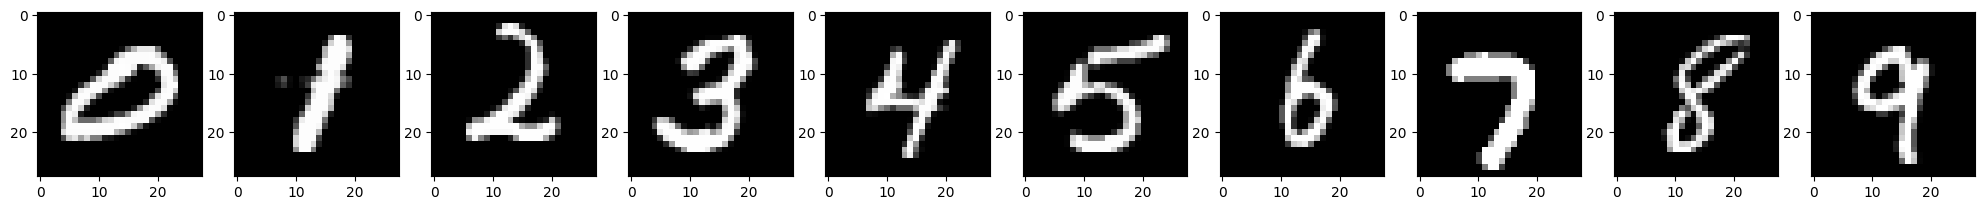

In [ ]:
# Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 10, figsize=(25, 3)) # Создаем полотно из 10 графиков

for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  axs[i].imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков

plt.show() # Показываем изображения

In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding

y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

# Меняем формат данных MNIST
# Надо добавить в конце размерность 1
# Чтобы свёрточная сеть понимала, что это чёрно-белые данные

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Посмотрим форматы выборок перед обучением

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


**Нейронная сеть**

In [ ]:
# задаём batch_size
batch_size = 128

# Создаем последовательную модель

model = Sequential()

model.add(BatchNormalization(input_shape=(28, 28, 1))) # Слой пакетной нормализации
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) # Второй сверточный слой
model.add(MaxPooling2D(pool_size=(2, 2))) # Первый слой подвыборки

model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Flatten())

model.add(Dense(256, activation='relu')) # Полносвязный слой для классификации
model.add(Dropout(0.25)) # Слой регуляризации Dropout
model.add(Dense(10, activation='softmax')) # Выходной полносвязный слой

# Компилируем сеть
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 28, 28, 1)        4         
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 6272)              0

Epoch 1/15
469/469 [==============================] - 16s 9ms/step - loss: 0.1580 - accuracy: 0.9520 - val_loss: 0.0476 - val_accuracy: 0.9839
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0516 - accuracy: 0.9843 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0351 - accuracy: 0.9883 - val_loss: 0.0373 - val_accuracy: 0.9878
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0268 - accuracy: 0.9912 - val_loss: 0.0319 - val_accuracy: 0.9897
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0216 - accuracy: 0.9928 - val_loss: 0.0277 - val_accuracy: 0.9910
Epoch 6/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0189 - accuracy: 0.9937 - val_loss: 0.0329 - val_accuracy: 0.9897
Epoch 7/15
469/469 [==============================] - 4s 8ms/step - loss: 0.0161 - accuracy: 0.9944 - val_loss: 0.0295 - val_accuracy: 0.9912
Epoch

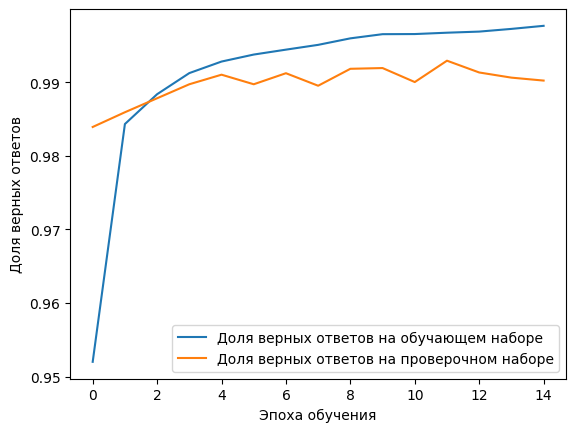

In [ ]:
# Обучаем сеть на данных mnist

history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображаем график точности обучения

plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

### **Сохраняем модель**

In [ ]:
model.save('saved_model.h5')

### **Подготовка запуска модели**

In [ ]:
text_code = '''
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def predict(img_path, model_path='./saved_model.h5'):
    classes = {0: '0',
               1: '1',
               2: '2',
               3: '3',
               4: '4',
               5: '5',
               6: '6',
               7: '7',
               8: '8',
               9: '9'}

    model = load_model(model_path)

    img = Image.open(img_path).resize((32, 32))
    image = np.array(img, dtype='float64') / 255

    image = np.expand_dims(image, axis=0)
    cls_image = np.argmax(model.predict(image))

    print(classes[cls_image])

'''

with open('script.py', 'w') as f:
    f.write(text_code)

In [ ]:
label_txt = '''

0
1
2
3
4
5
6
7
8
9

'''

with open('label.txt', 'w') as f:
    f.write(label_txt.strip())

In [ ]:
import os
from zipfile import ZipFile as Zip

integrate_files = ['saved_model.h5', 'script.py', 'label.txt']

zipArchive = Zip('/content/archive.zip', 'w')

for file in integrate_files:
    if os.path.exists(file):
        zipArchive.write(file)
    else:
        print(f'Файл {file} отсутствует!')

zipArchive.close()